In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
y = data['label'].values
X= data.drop('label',axis=1)

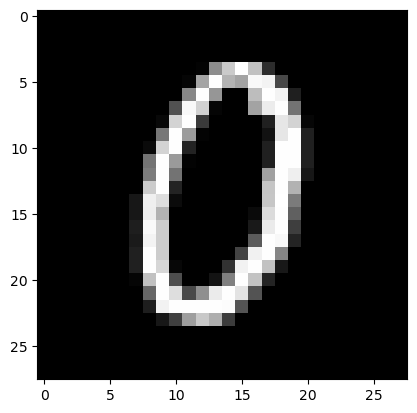

In [4]:
img = X.iloc[5].values.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(784,)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
    

C:\Users\Ashish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_test,y_test))


Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7580 - loss: 5.1970 - val_accuracy: 0.8986 - val_loss: 0.4595
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9266 - loss: 0.2954 - val_accuracy: 0.9324 - val_loss: 0.3231
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9461 - loss: 0.2003 - val_accuracy: 0.9395 - val_loss: 0.2781
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9559 - loss: 0.1614 - val_accuracy: 0.9457 - val_loss: 0.2331
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9626 - loss: 0.1327 - val_accuracy: 0.9452 - val_loss: 0.2212


In [10]:
y_pred=model.predict(X_test).argmax(axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
the predicted value of label is : 6


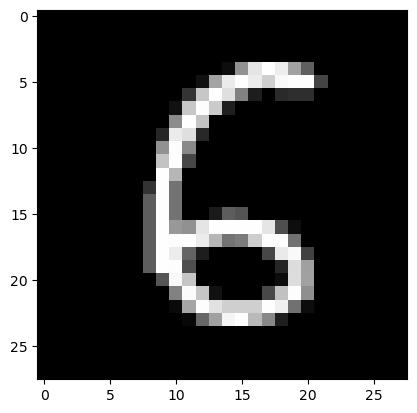

In [11]:
img = X_test.iloc[5].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("the predicted value of label is :",model.predict(X_test).argmax(axis=1)[5])
plt.show()

In [12]:
y_pred

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

In [13]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_test[5]

6

In [15]:
accuracy_score(y_pred,y_test)

0.9452380952380952